# Part 1 ‑ Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

In [2]:
df=pd.read_json('../ultimate_challenge/logins.json')

# Cleaning Data

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)

In [6]:
df.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [7]:
first_login=df.index[1]
first_login

Timestamp('1970-01-01 20:13:18')

In [8]:
last_login=df.index[-1]
last_login

Timestamp('1970-04-13 18:57:38')

The dataset is between January and April 13 in 1970

In [9]:
df_delta15 = df.resample("15min").sum()
df_delta15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# Data Story

## Process time-series data into 15min chunks

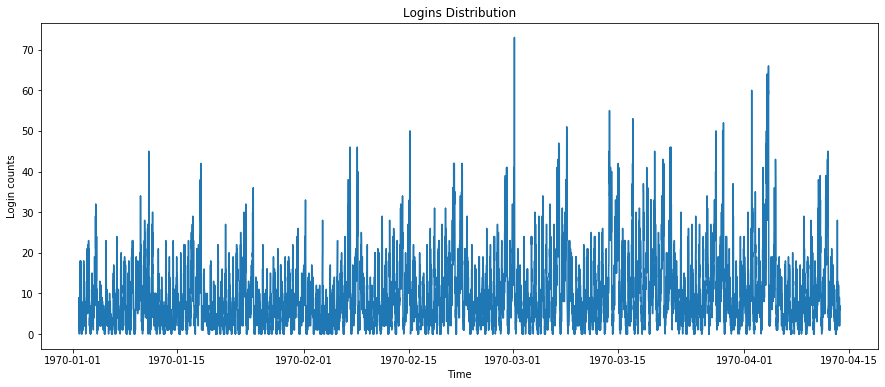

In [10]:
# plot the data
fig, ax = plt.subplots(figsize = (15,6))
plt.xlabel('Time')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.plot(df_delta15.index, df_delta15['count'])

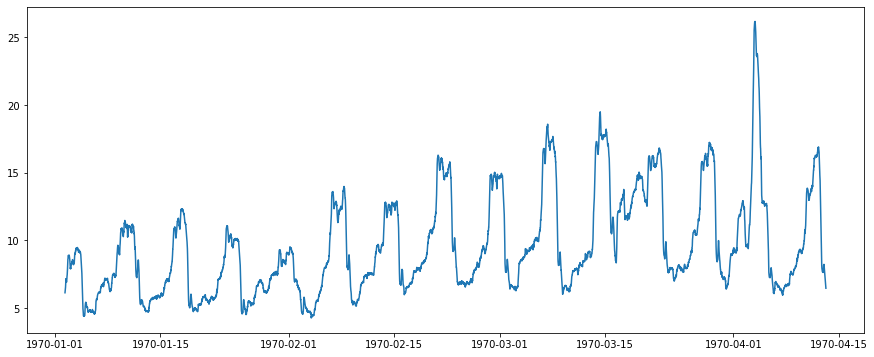

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(df_delta15.rolling(window=96, center=True).mean())
plt.show()

## Daily Distribution of data

In [12]:
df_day = df.resample("D").sum()
df_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [13]:
# bin data by the day
bussines = df.resample('B').sum()
fridays = df.resample('W-FRI').sum()
saturdays = df.resample('W-SAT').sum()
sundays = df.resample('W-SUN').sum()


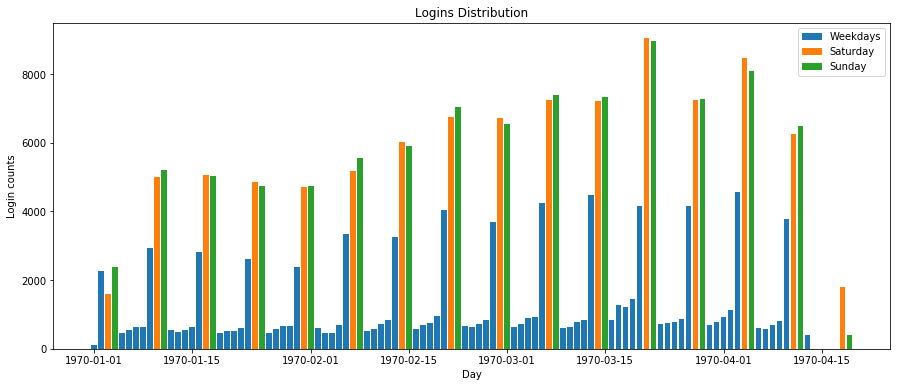

In [14]:
plt.subplots(figsize = (15,6))
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.bar(bussines.index, bussines['count'],label='Weekdays')
plt.bar(saturdays.index, saturdays['count'],label='Saturday')
plt.bar(sundays.index, sundays['count'],label='Sunday')
#plt.bar(fridays.index, fridays['count'],label='Friday')
plt.legend()

In [15]:
df_weekday = df.resample('D').sum()
df_weekday['day_of_week'] = df_weekday.index.day_name()
df_weekday

,count,day_of_week
login_time,,
1970-01-01,112,Thursday
1970-01-02,681,Friday
1970-01-03,793,Saturday
1970-01-04,788,Sunday
1970-01-05,459,Monday
...,...,...
1970-04-09,818,Thursday
1970-04-10,1009,Friday
1970-04-11,1352,Saturday


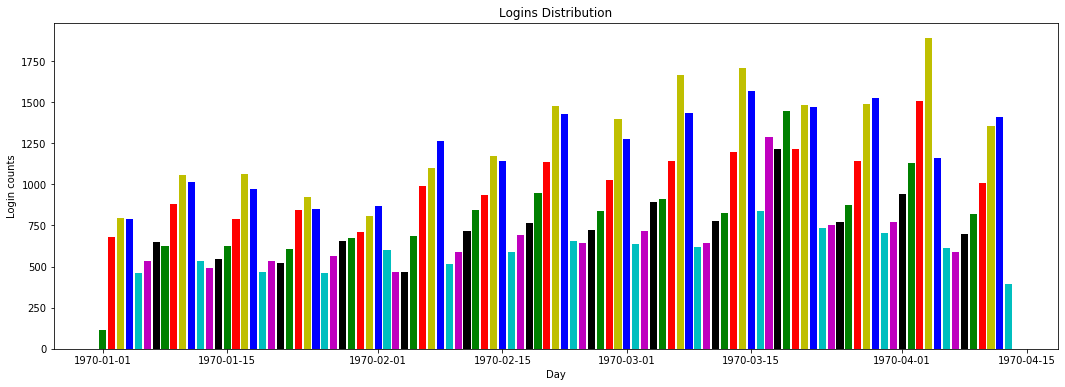

In [16]:
plt.subplots(figsize = (18,6))
plt.bar(df_weekday.index,df_weekday['count'],color='grybcmk')
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.show()

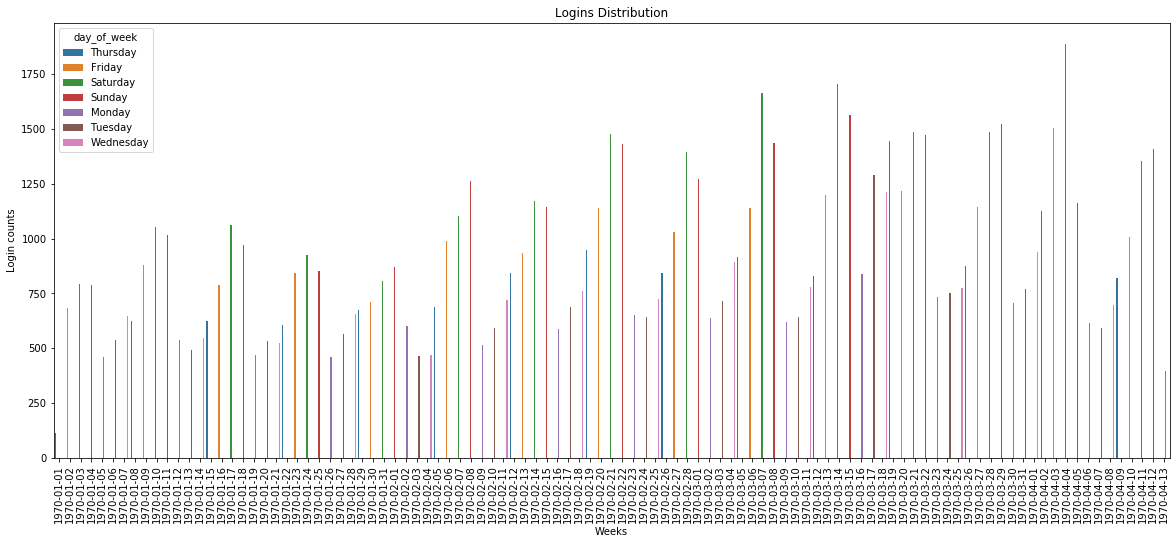

In [17]:
plt.subplots(figsize = (20,8))
sns.barplot(df_weekday.index.date,df_weekday['count'],hue='day_of_week',data=df_weekday)
plt.xlabel('Weeks')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_weekday.groupby('day_of_week')['count'].mean()

day_of_week
Friday       1013.866667
Monday        588.200000
Saturday     1291.800000
Sunday       1211.133333
Thursday      797.333333
Tuesday       662.000000
Wednesday     738.500000
Name: count, dtype: float64

People login mostly weekends and Fridays. And the least logins is Mondays. The highest login date is Saturday, April 4th 1970.

## Hourly Distribution of data

In [19]:
df_hour = df.resample('H').sum()
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


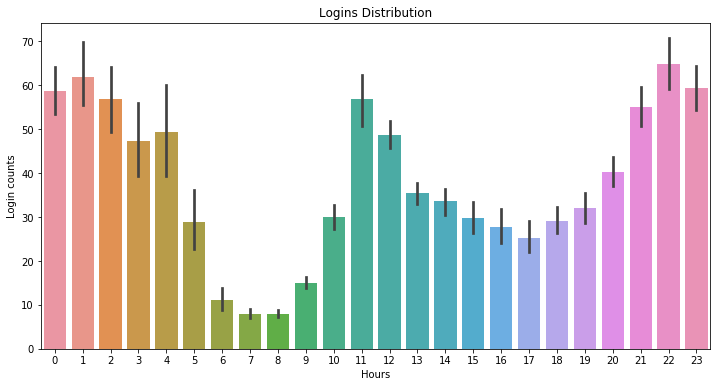

In [20]:
plt.subplots(figsize = (12,6))
g=sns.barplot(x=df_hour.index.hour,y='count',data=df_hour)
plt.xlabel('Hours')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.show()

People login mostly between 9pm-5am. In addition, they login during day time between 11am-1pm

## Weekly Distribution of data

In [21]:
df_week = df.resample('W').sum()
df_week.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


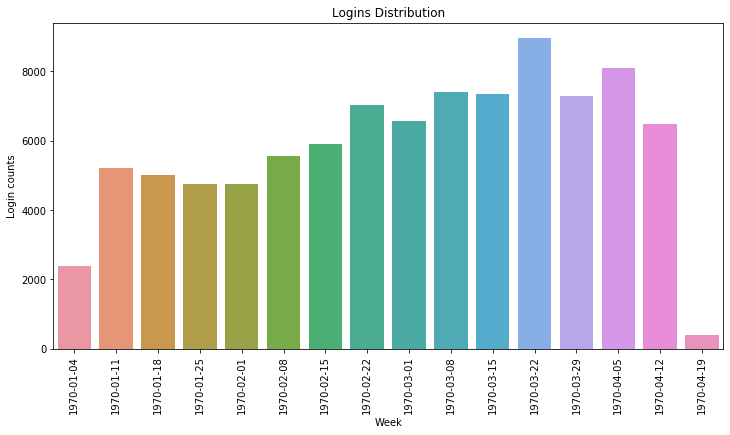

In [22]:
plt.subplots(figsize = (12,6))
g=sns.barplot(x=df_week.index.date,y='count',data=df_week)
plt.xlabel('Week')
plt.ylabel('Login counts')
plt.title('Logins Distribution')
plt.xticks(rotation=90)
plt.show()

Most logins is in 12th week which is between 1970-03-15 and 1730-03-22.

# Part 2 - Experiment and Metrics Design

    Firstly, I make assumptions that there is an electronic device which we can check counts of the cars on the bridge, and we have data before the experiment. 


    We know that Ultimate Gotham is most active at night and Ultimate Metropolis is active during the day on weekdays. So, the toll bridge is active all the time during weekdays. According to this assumption. I would use a hypothesis test. 
    
    Null hypothesis H0: The mean counts of the cars on the bridge before reimbursements were offered of all toll costs is not significantly different from the mean counts of cars after reimbursements were offered.

    Alternative hypothesis H1: The mean counts of the cars on the bridge before reimbursements were offered of all toll costs is significantly different from the mean counts of cars after reimbursements were offered.
    
    I would use z-test to find p- value of the hypothesis. 
    
    If we consider the significance level to be at 0.05, then to accept the null hypothesis, p-value should be more than the chosen significance level.

    If p- value is less than 0.05, then I will reject the null hypothesis. I will accept that there is a significant difference between these two experiments.
